The number of billionaires in a country says a lot about the business environment, startup success rate, and many other economic features of a Country. So if you want to learn more about how we can find relationships among billionaires around the world, this article is for you. In this article, I will walk you through the task of billionaires analysis with Python.

The dataset that I am using to analyze the data about billionaires around the world was curated by Forbes and is downloaded from Kaggle. The dataset contains information about global billionaires in 2023, including their:

Names
Net Worth 
Country 
Source 
Rank
Age
Industry

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
df=pd.read_csv('Forbes Billionaires.csv')

In [30]:
df.head()

,Rank,Name,Networth,Age,Country,Source,Industry
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments


Before we go ahead, let’s see whether or not this dataset contains missing values:

In [5]:
print(df.isnull().sum())

Rank        0
Name        0
Networth    0
Age         0
Country     0
Source      0
Industry    0
dtype: int64


No Missing values Found.It looks like data is already pre-processed so we can jump directly to EDA.

In [6]:
df.shape

(2600, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rank      2600 non-null   int64  
 1   Name      2600 non-null   object 
 2   Networth  2600 non-null   float64
 3   Age       2600 non-null   int64  
 4   Country   2600 non-null   object 
 5   Source    2600 non-null   object 
 6   Industry  2600 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 142.3+ KB


In [8]:
df.describe()

,Rank,Networth,Age
count,2600.000000,2600.000000,2600.000000
mean,1269.570769,4.860750,64.271923
std,728.146364,10.659671,13.220607
min,1.000000,1.000000,19.000000
25%,637.000000,1.500000,55.000000
50%,1292.000000,2.400000,64.000000
75%,1929.000000,4.500000,74.000000
max,2578.000000,219.000000,100.000000


Now let’s have a look at the top 5 industries with the most number of billionaires:

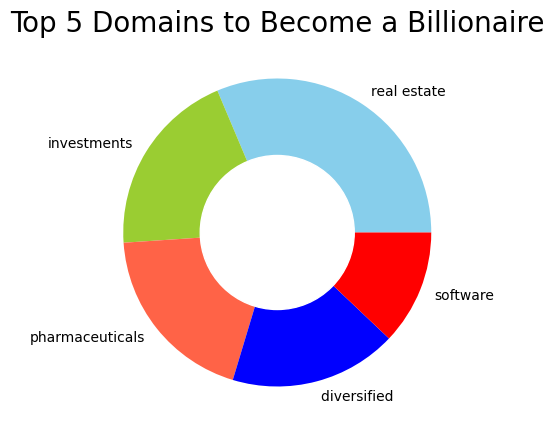

In [17]:
a = df["Source"].value_counts().head()
index = a.index
sources = a.values
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(5, 5))
plt.pie(sources, labels=index, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 5 Domains to Become a Billionaire", fontsize=20)
plt.show()

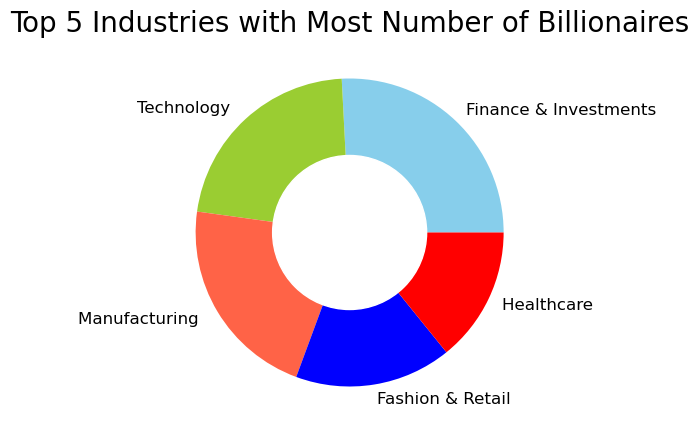

In [18]:
a = df["Industry"].value_counts().head()
index = a.index
industries = a.values
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(5, 5))
plt.pie(industries, labels=index, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 5 Industries with Most Number of Billionaires", fontsize=20)
plt.show()

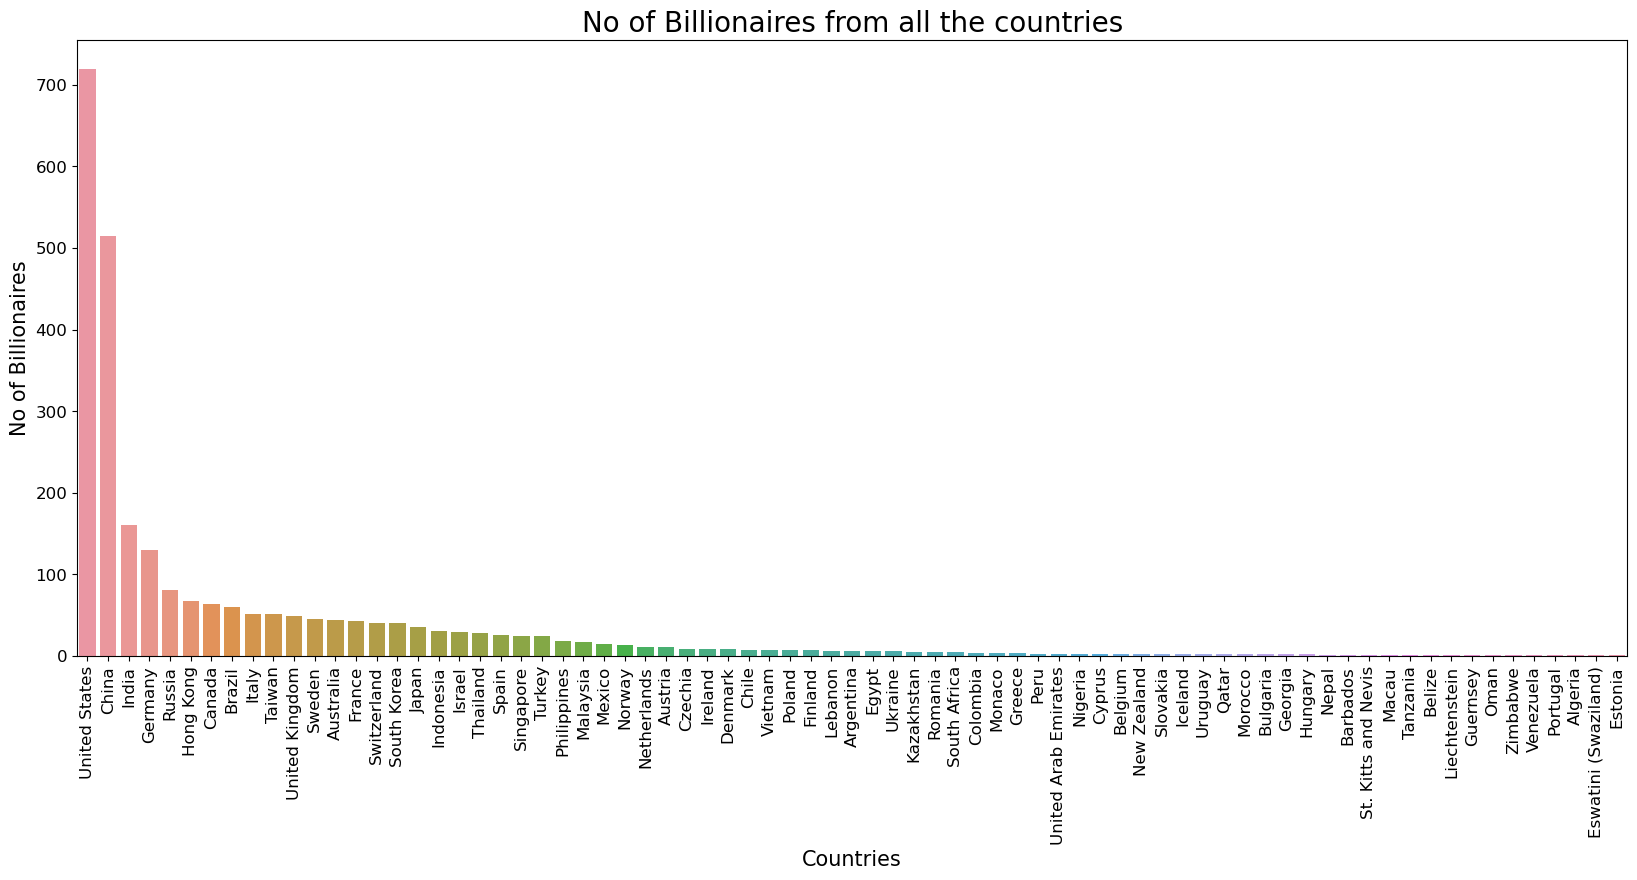

In [19]:
plt.figure(figsize=(20,8))
sns.countplot( data=df, x="Country", order=df['Country'].value_counts().index)
plt.xticks(rotation=90)
plt.ylabel("No of Billionaires", fontsize=15)
plt.xlabel("Countries", fontsize=15)
plt.title("No of Billionaires from all the countries", fontsize=20)
plt.show()

In [20]:
df['Country'].value_counts().nlargest(10)

United States    719
China            515
India            161
Germany          130
Russia            81
Hong Kong         67
Canada            64
Brazil            60
Italy             52
Taiwan            51
Name: Country, dtype: int64

In [ ]:
How old are billionairs?

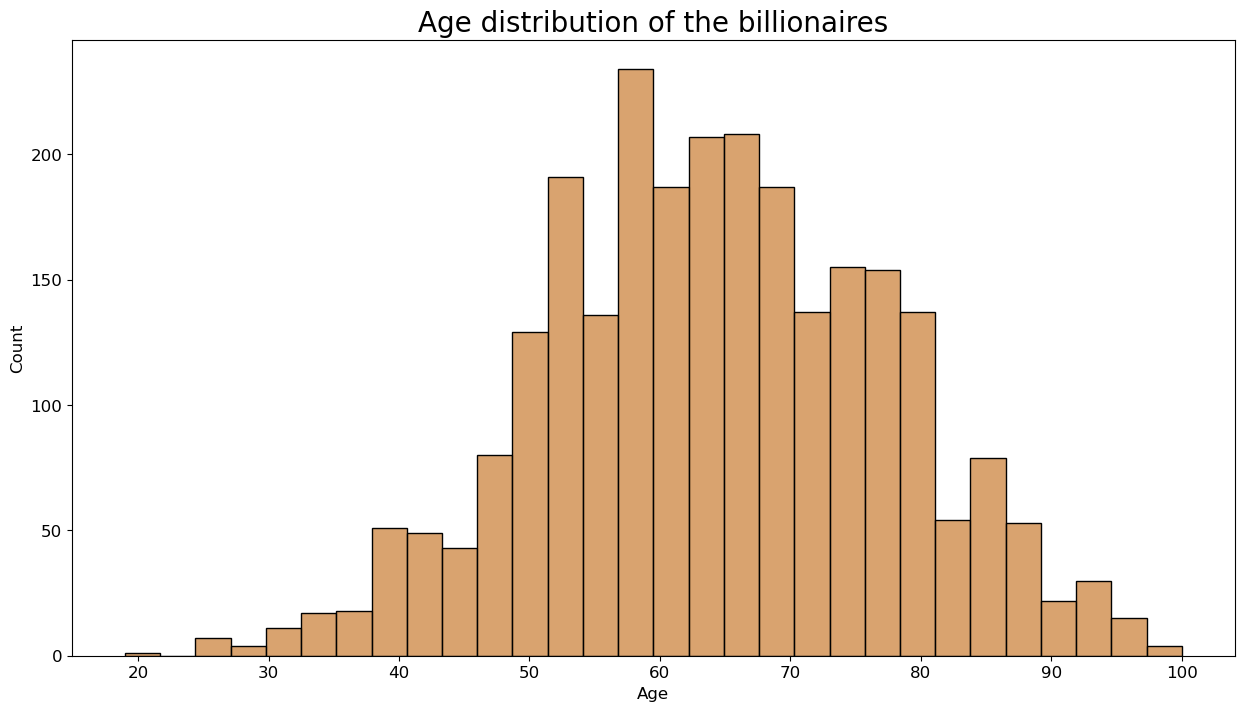

In [21]:
plt.figure(figsize = (15,8))
sns.histplot(data = df, x = 'Age', color = 'peru')
plt.title('Age distribution of the billionaires',fontsize=20)
plt.show()

In [ ]:
Who is the Youngest Billionaire?

In [22]:
df.loc[df.Age == df.Age.min()] 

,Rank,Name,Networth,Age,Country,Source,Industry
1311,1292,Kevin David Lehmann,2.4,19,Germany,drugstores,Fashion & Retail


In [ ]:
Age Group of Billionaires?

In [23]:
df['age_group'] = pd.cut(df['Age'], bins = [18, 30, 50, 70, 100], include_lowest = True, labels = ['18-30', '30-50', '50-70','70+'])
df.head()

,Rank,Name,Networth,Age,Country,Source,Industry,age_group
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive,30-50
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology,50-70
2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail,70+
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology,50-70
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments,70+


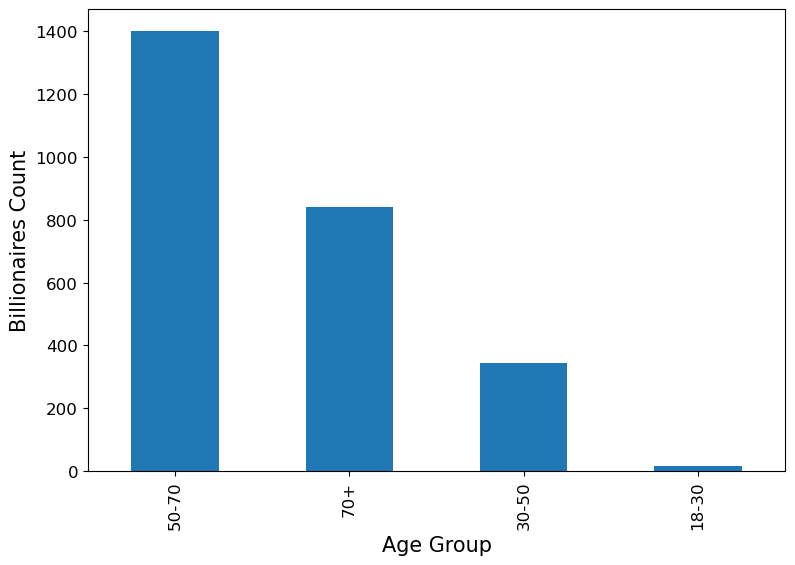

In [24]:
df['age_group'].value_counts().plot(kind='bar', figsize=(9,6))
plt.xlabel("Age Group", fontsize=15)
plt.ylabel("Billionaires Count", fontsize=15)
plt.show()

In [ ]:
What billionairs do?

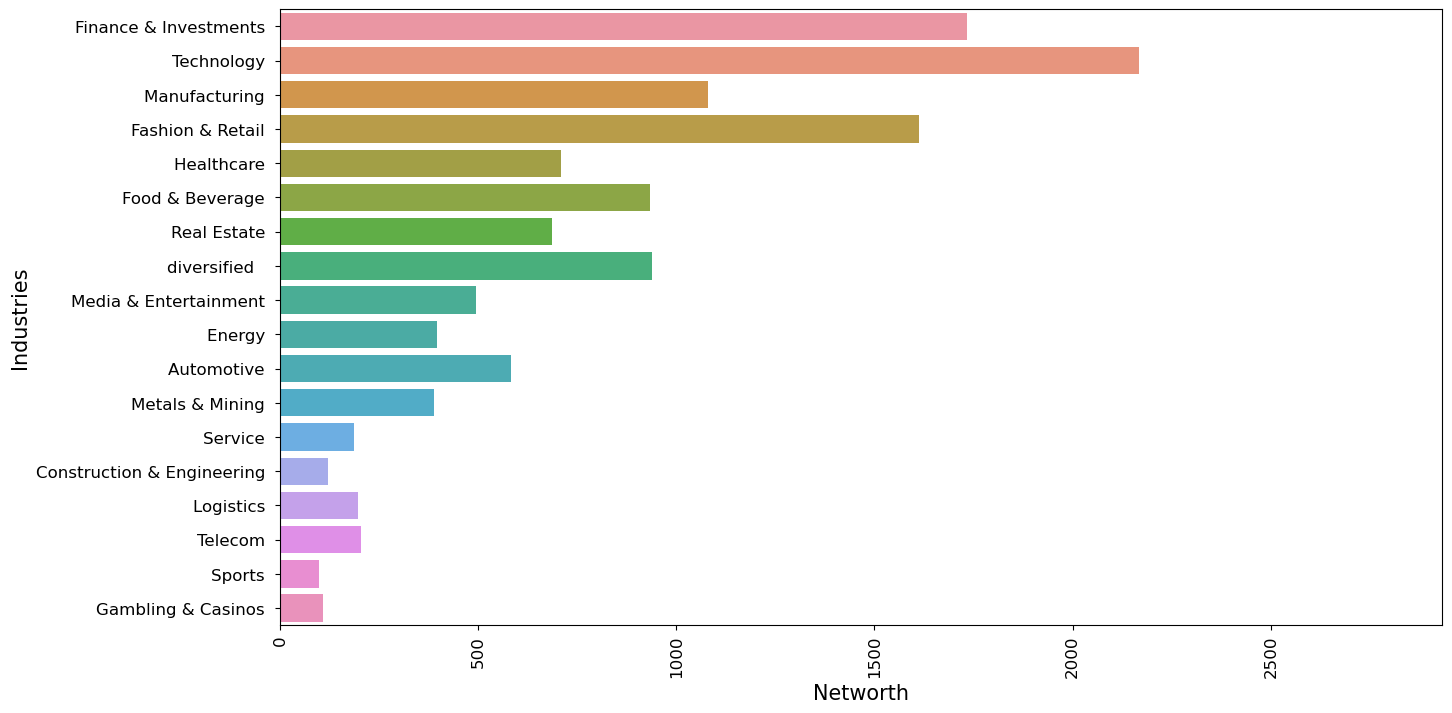

In [25]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x = "Networth", y = "Industry", order = df['Industry'].value_counts().index, estimator = sum , errwidth = 0)
plt.xticks(rotation=90)
plt.xlabel("Networth", fontsize=15)
plt.ylabel("Industries", fontsize=15)
plt.show()

Top 5 Billionaires from India ?


In [33]:
indians = df[df['Country'] == 'India']

In [34]:
top_5_indians = indians.sort_values('Networth',ascending=False).head()

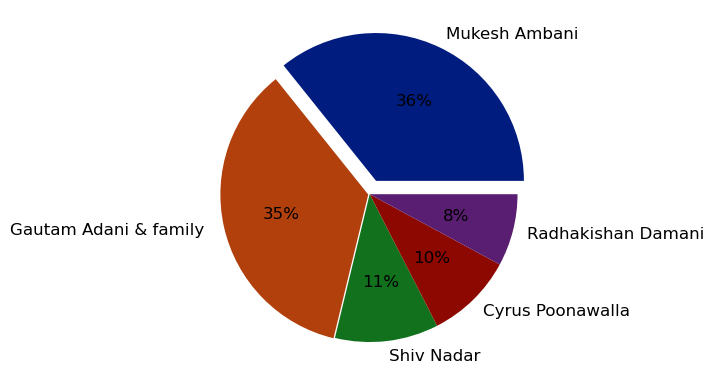

In [35]:
# declaring exploding pie
explode = [0.1, 0.01, 0, 0, 0]
# define Seaborn color palette to use
palette_color = sns.color_palette('dark')
  
# plotting data on chart
plt.pie(top_5_indians['Networth'], labels=top_5_indians['Name'], colors=palette_color,
        explode=explode, autopct='%.0f%%')
  
# displaying chart
plt.show()

Top 5 Billionaires from United States ?

In [36]:
us_df = df[df['Country'] == 'United States'].sort_values('Networth',ascending=False).head()
us_df

,Rank,Name,Networth,Age,Country,Source,Industry
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments
5,6,Larry Page,111.0,49,United States,Google,Technology


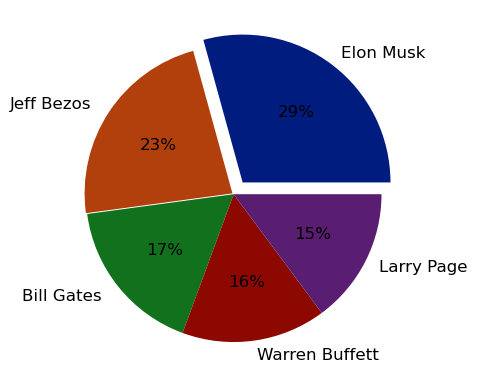

In [37]:
# plotting data on chart
plt.pie(us_df['Networth'], labels=us_df['Name'], colors=palette_color,
        explode=explode, autopct='%.0f%%')
  
# displaying chart
plt.show()

Now let’s have a look at the top 5 countries with the most number of billionaires:

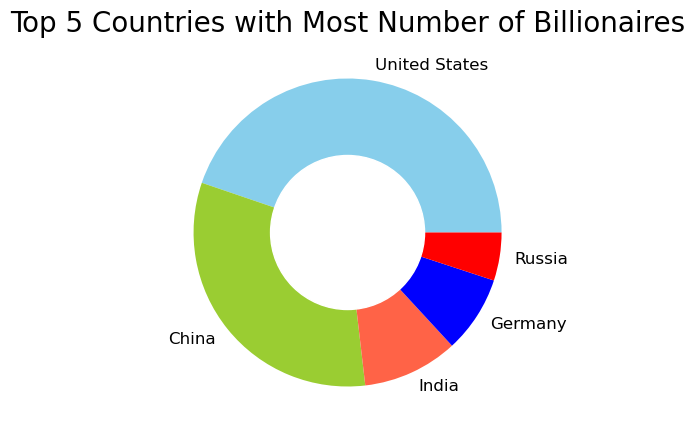

In [39]:
a = df["Country"].value_counts().head()
index = a.index
Countries = a.values
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(5, 5))
plt.pie(Countries, labels=index, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 5 Countries with Most Number of Billionaires", fontsize=20)
plt.show()

The visualization above shows that the United States and China are the countries from which most people become billionaires. So that means the business environment and the startup success rate is really good in the US and China compared to the rest of the world.

So this is how you can find patterns among billionaires around the world to analyze the business environment of countries. The success of a business or startup depends a lot on the business environment of a country. At the end of the analysis of global billionaires, I found that China and the United States are the countries with the most billionaires which concludes that the business environment and the success rate of a startup is much better in the US and China than in the rest of the world. Hope you liked this article on Billionaires Analysis with Python. Please feel free to ask your valuable questions in the comments section below.